Was done using the Haplotype-Called Mutations (filtered for those not in gnomAD) and Haining's +1 Nuc file

In [1]:
import pandas as pd
import pysam
import os

In [2]:
# Filter for mutations that are "exposed" (occur at ~10bpish from the center of nucleosome occupancy)

mut_path = "/home/ubuntu/honors_research/peak_align/phased_haplotype_muts/merged_unique_variants.bed"
nuc_path = "/home/ubuntu/honors_research/peak_align/edited_TSS_all_adj+1Nuc_250bp.bed" #expanded bed file
mutations = pd.read_csv(mut_path, sep="\t", header=None)
nucleosomes = pd.read_csv(nuc_path, sep="\t", header = None)
nucleosomes.columns = ["chrom", "start", "end", "NAME", "score", "strand", "distance_to_nuc", "phase"]


In [3]:
len(mutations[1])

193024

In [4]:
# peak align files
phase0 = pd.read_csv("/home/ubuntu/honors_research/peak_align/phased_haplotype_muts/phase0.cdt", sep="\t")
phase1 = pd.read_csv("/home/ubuntu/honors_research/peak_align/phased_haplotype_muts/phase1.cdt", sep="\t")
phase2 = pd.read_csv("/home/ubuntu/honors_research/peak_align/phased_haplotype_muts/phase2.cdt", sep="\t")
phase3 = pd.read_csv("/home/ubuntu/honors_research/peak_align/phased_haplotype_muts/phase3.cdt", sep="\t")
phase4 = pd.read_csv("/home/ubuntu/honors_research/peak_align/phased_haplotype_muts/phase4.cdt", sep="\t")
phase5 = pd.read_csv("/home/ubuntu/honors_research/peak_align/phased_haplotype_muts/phase5.cdt", sep="\t")
phase6 = pd.read_csv("/home/ubuntu/honors_research/peak_align/phased_haplotype_muts/phase6.cdt", sep="\t")
phase7 = pd.read_csv("/home/ubuntu/honors_research/peak_align/phased_haplotype_muts/phase7.cdt", sep="\t")
phase8 = pd.read_csv("/home/ubuntu/honors_research/peak_align/phased_haplotype_muts/phase8.cdt", sep="\t")
phase9 = pd.read_csv("/home/ubuntu/honors_research/peak_align/phased_haplotype_muts/phase9.cdt", sep="\t")
phase10 = pd.read_csv("/home/ubuntu/honors_research/peak_align/phased_haplotype_muts/phase10.cdt", sep="\t")

# merging all peak align files into one big df
phases = [phase0, phase1, phase2, phase3, phase4, phase5, phase6, phase7, phase8, phase9, phase10]
merged_phases = pd.concat(phases)
merged_phases

,NAME,0,1,2,3,4,5,6,7,8,...,240,241,242,243,244,245,246,247,248,249
0,chr1_21782419_21782419,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,chr16_68085718_68085718,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,chr1_148634329_148634329,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,chr1_156747365_156747365,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,chr1_172449989_172449989,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6055,chr18_57435408_57435408,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6056,chr19_37251877_37251877,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6057,chr8_1701428_1701428,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6058,chr13_108215535_108215535,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
#plan2:
# get each peak align file -> filter for where there are no 0's 
# look at the positioning + nucleosomes where there are no 0's for the columns ~10bp x from the center (=125)
# filter for mutations that fall within that range

In [5]:

merged_phases = pd.merge(merged_phases, nucleosomes[["chrom", "start", "NAME"]], 
                  on="NAME", how="left")


In [6]:

# move chrom and start after NAME
merged_phases = merged_phases[["chrom", "start", "NAME"] + list(merged_phases.columns[1:-2])]


In [7]:
# dropping NAME column
merged_phases = merged_phases.drop(columns=["NAME"])

In [8]:
merged_phases

,chrom,start,0,1,2,3,4,5,6,7,...,240,241,242,243,244,245,246,247,248,249
0,chr1,21782294,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,chr16,68085593,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,chr1,148634204,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,chr1,156747240,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,chr1,172449864,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51311,chr18,57435283,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51312,chr19,37251752,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51313,chr8,1701303,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51314,chr13,108215410,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:

# selecting columns every 10 from 4 (4,5,6, 14, 15, 16, 24, 25, 26, etc.)
columns_to_select = []
for col in range(merged_phases.shape[1]):
    if (col) % 10 == 0:  # Check if the column index minus 4 is a multiple of 10
        columns_to_select.extend([col+1, col+2, col + 3])
columns_to_select

[1,
 2,
 3,
 11,
 12,
 13,
 21,
 22,
 23,
 31,
 32,
 33,
 41,
 42,
 43,
 51,
 52,
 53,
 61,
 62,
 63,
 71,
 72,
 73,
 81,
 82,
 83,
 91,
 92,
 93,
 101,
 102,
 103,
 111,
 112,
 113,
 121,
 122,
 123,
 131,
 132,
 133,
 141,
 142,
 143,
 151,
 152,
 153,
 161,
 162,
 163,
 171,
 172,
 173,
 181,
 182,
 183,
 191,
 192,
 193,
 201,
 202,
 203,
 211,
 212,
 213,
 221,
 222,
 223,
 231,
 232,
 233,
 241,
 242,
 243,
 251,
 252,
 253]

In [35]:
# Ensure column indices are valid (within bounds)
columns_to_select = [col for col in columns_to_select if 0 <= col < merged_phases.shape[1]]
# selecting first column + columns to select
merged_phases_filtered = merged_phases.iloc[:, [0] + columns_to_select]
merged_phases_filtered


,chrom,start,0,1,9,10,11,19,20,21,...,219,220,221,229,230,231,239,240,241,249
0,chr1,21782294,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,chr16,68085593,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,chr1,148634204,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,chr1,156747240,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,chr1,172449864,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51311,chr18,57435283,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51312,chr19,37251752,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51313,chr8,1701303,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51314,chr13,108215410,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
merged_phases_filtered = merged_phases_filtered[merged_phases_filtered.iloc[:, 2:].sum(axis=1) != 0] # filter out rows where all selected columns are 0
merged_phases_filtered

,chrom,start,0,1,9,10,11,19,20,21,...,219,220,221,229,230,231,239,240,241,249
4,chr1,172449864,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,chr12,52874085,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
78,chr1,182029719,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
80,chr1,203306239,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
81,chr1,21632458,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51013,chr11,74492691,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51039,chr11,93197454,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51067,chr10,96124745,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
51150,chr1,9652059,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:

# loop through the filtered phase0_filtered dataframe (to get to the cells/values)
# split NAME column by "_" -> should get 3 values (chrom, start, end)
# if the value isn't 0 ->  do (column number + start) 
# if the value = 1-> find the mutation that corresponds to the start posiition in the mutations file, matching with chromosome
# if value > 1 -> find all mutations that correspond to the start position in the mutations file, matching with chromosome
# for each "found" mutation -> add it to a new dataframe

filtered_mutations = mutations.copy()
filtered_mutations["exposed"] = "not_exposed"

accum = 0
for idx, row in merged_phases_filtered.iterrows():
    start = int(row[1])
    chrom = row[0]

    
    for col in row.index[2:]:
        value = row[col]
        if value != 0:
            added = int(col)
            pos = start + added
            # print(pos)

            # matching
            matching = filtered_mutations[
                (filtered_mutations[0] == chrom) &
                (filtered_mutations[1] == pos)
            ]
            
            # if matching -> put "exposed" in a new column in mutations df

            if not matching.empty:
                filtered_mutations.loc[
                    (filtered_mutations[0] == chrom) & (filtered_mutations[1] == pos), "exposed"
                ] = "exposed"
                accum += 1


#final_df = pd.DataFrame(output_rows)
print(accum)
filtered_mutations


/tmp/ipykernel_1265496/3856510952.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start = int(row[1])
/tmp/ipykernel_1265496/3856510952.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  chrom = row[0]
/tmp/ipykernel_1265496/3856510952.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start = int(row[1])
/tmp/ipykernel_1265496/3856510952.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In 

758


/tmp/ipykernel_1265496/3856510952.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start = int(row[1])
/tmp/ipykernel_1265496/3856510952.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  chrom = row[0]
/tmp/ipykernel_1265496/3856510952.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start = int(row[1])
/tmp/ipykernel_1265496/3856510952.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In 

,0,1,2,exposed
0,chr1,86377,86378,not_exposed
1,chr1,139232,139233,not_exposed
2,chr1,817185,817186,not_exposed
3,chr1,825766,825767,not_exposed
4,chr1,905372,905373,not_exposed
...,...,...,...,...
193019,chrY,56823143,56823144,not_exposed
193020,chrY,56823146,56823147,not_exposed
193021,chrY,56858714,56858715,not_exposed
193022,chrY,56862954,56862955,not_exposed


Adding mutation context


In [38]:
# loading vcf files
folder_path = '/home/ubuntu/honors_research/vcf_files'
vcf_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.vcf.gz')]

variant_set = set()
for vcf_file in vcf_files:
    vcf = pysam.VariantFile(vcf_file)
    for record in vcf:
        variant_old = f"{record.chrom}:{record.pos}:{record.ref}>{','.join(record.alts)}"
        chr_name, pos, mutation = variant_old.split(':')
        ref, alt = mutation.split(">")
        

#chr1	86374	86375	A>AT

        pos_start = int(pos) -1

        # Filter out insertions and deletions (ref and alt lengths must be equal)
        if (len(ref) > 1) or  (len(alt) > 1):
            continue

        pos_start = int(pos) - 1
        pos_end = int(pos) + len(ref) - 1
            
            
            

        variant = f"{record.chrom}:{pos_start}:{pos_end}:{record.ref}>{','.join(record.alts)}"

        variant_set.add(variant)


    # create a dataframe (with chrom, pos, ref>alt columns -> 3 in total)
vcf_df = pd.DataFrame(list(variant_set), columns=["variant"])
vcf_df["chrom"] = vcf_df["variant"].apply(lambda x: x.split(":")[0])
vcf_df["start"] = vcf_df["variant"].apply(lambda x: int(x.split(":")[1]))
vcf_df["end"] = vcf_df["variant"].apply(lambda x: int(x.split(":")[2]))
vcf_df["ref_alt"] = vcf_df["variant"].apply(lambda x: x.split(":")[3])
vcf_df = vcf_df[["chrom", "start", "end", "ref_alt"]]
vcf_df
#variant_set



[W::hts_idx_load3] The index file is older than the data file: /home/ubuntu/honors_research/vcf_files/28815_output.g.vcf.gz.tbi
[W::hts_idx_load3] The index file is older than the data file: /home/ubuntu/honors_research/vcf_files/28814_output.g.vcf.gz.tbi
[W::hts_idx_load3] The index file is older than the data file: /home/ubuntu/honors_research/vcf_files/28812_output.g.vcf.gz.tbi
[W::hts_idx_load3] The index file is older than the data file: /home/ubuntu/honors_research/vcf_files/28813_output.g.vcf.gz.tbi
[W::hts_idx_load3] The index file is older than the data file: /home/ubuntu/honors_research/vcf_files/28816_output.g.vcf.gz.tbi


,chrom,start,end,ref_alt
0,chr1,42223340,42223341,A>C
1,chr1,41841522,41841523,A>G
2,chr4,119098731,119098732,G>A
3,chr16,2753992,2753993,G>A
4,chrUn_GL000219v1,159133,159134,G>C
...,...,...,...,...
215229,chr15,40512374,40512375,G>C
215230,chr6,76639366,76639367,G>A
215231,chr2,193105173,193105174,G>T
215232,chr16,30603535,30603536,G>T


In [39]:
filtered_mutations.rename(columns={0: "chrom", 1: "start", 2: "end"}, inplace=True)
filtered_mutations

,chrom,start,end,exposed
0,chr1,86377,86378,not_exposed
1,chr1,139232,139233,not_exposed
2,chr1,817185,817186,not_exposed
3,chr1,825766,825767,not_exposed
4,chr1,905372,905373,not_exposed
...,...,...,...,...
193019,chrY,56823143,56823144,not_exposed
193020,chrY,56823146,56823147,not_exposed
193021,chrY,56858714,56858715,not_exposed
193022,chrY,56862954,56862955,not_exposed


In [40]:
merged_df = filtered_mutations.merge(
    vcf_df[["chrom", "start", "end", "ref_alt"]],  # Select only relevant columns from vcf_df
    on=["chrom", "start", "end"],  # Match on chrom, start, and end
    how="left"  # Use a left join to keep all rows from mutations
)
merged_df
# Add the ref_alt column to mutations
# mutations["ref_alt"] = merged_df["ref_alt"]
# mutations

,chrom,start,end,exposed,ref_alt
0,chr1,86377,86378,not_exposed,A>T
1,chr1,139232,139233,not_exposed,C>A
2,chr1,817185,817186,not_exposed,G>A
3,chr1,825766,825767,not_exposed,T>C
4,chr1,905372,905373,not_exposed,T>C
...,...,...,...,...,...
193055,chrY,56823143,56823144,not_exposed,G>T
193056,chrY,56823146,56823147,not_exposed,G>T
193057,chrY,56858714,56858715,not_exposed,G>A
193058,chrY,56862954,56862955,not_exposed,C>A


In [41]:
#finding mutations in merged_df that aren't in filtered_mutations


# Perform an outer merge to find differences
differences = merged_df.merge(
    filtered_mutations,
    on=['chrom', 'start', 'end'],  # Specify the columns to match
    how='left',  # Keep all rows from merged_df
    indicator=True  # Add a column to indicate the source of each row
)

merge_counts = differences['_merge'].value_counts()


In [42]:
#finding duplicate mutations in merged_df
duplicate_mutations = merged_df[merged_df.duplicated(subset=['chrom', 'start', 'end'], keep=False)]
duplicate_mutations

,chrom,start,end,exposed,ref_alt
4811,chr1,65494899,65494900,not_exposed,T>C
4812,chr1,65494899,65494900,not_exposed,T>A
4813,chr1,65494899,65494900,not_exposed,T>C
4814,chr1,65494899,65494900,not_exposed,T>A
16896,chr1,226063109,226063110,not_exposed,T>C
...,...,...,...,...,...
153814,chr6,106155230,106155231,not_exposed,C>A
157047,chr6,142057917,142057918,not_exposed,G>C
157048,chr6,142057917,142057918,not_exposed,G>A
157049,chr6,142057917,142057918,not_exposed,G>C


In [43]:
# removing duplicates in merged_df
merged_df_nodups = merged_df.drop_duplicates(subset=['chrom', 'start', 'end'])
merged_df_nodups

,chrom,start,end,exposed,ref_alt
0,chr1,86377,86378,not_exposed,A>T
1,chr1,139232,139233,not_exposed,C>A
2,chr1,817185,817186,not_exposed,G>A
3,chr1,825766,825767,not_exposed,T>C
4,chr1,905372,905373,not_exposed,T>C
...,...,...,...,...,...
193055,chrY,56823143,56823144,not_exposed,G>T
193056,chrY,56823146,56823147,not_exposed,G>T
193057,chrY,56858714,56858715,not_exposed,G>A
193058,chrY,56862954,56862955,not_exposed,C>A


In [44]:
merged_df_nodups[merged_df_nodups.duplicated(subset=['chrom', 'start', 'end'], keep=False)]


,chrom,start,end,exposed,ref_alt


In [45]:
import pysam

def add_context_column(df, reference_genome_path):
    """
    Adds a 'context' column to the DataFrame with the nucleotide context (before, SNP, after).

    Parameters:
    df (pd.DataFrame): DataFrame containing mutation information with 'chrom', 'start', and 'end' columns (0-based).
    reference_genome_path (str): Path to the reference genome (e.g., hg38.fa.gz).

    Returns:
    pd.DataFrame: Updated DataFrame with a new 'context' column.
    """
    # Load the reference genome
    fasta = pysam.FastaFile(reference_genome_path)

    # Function to fetch context for a single mutation
    def fetch_context(row):
        try:
            chrom = row['chrom']
            pos = row['start'] + 1  # Convert 0-based to 1-based for pysam
            ref = fasta.fetch(chrom, pos - 1, pos)  # Reference nucleotide at the SNP position
            before = fasta.fetch(chrom, pos - 2, pos - 1)  # Nucleotide before
            after = fasta.fetch(chrom, pos, pos + 1)  # Nucleotide after

            # Making everything in caps
            before = before.upper()
            ref = ref.upper()
            after = after.upper()


            return f"{before}{ref}{after}"
        except KeyError:
            # Handle cases where the chromosome is not found in the reference genome
            return "Context not found"

    # Apply the fetch_context function to each row in the DataFrame
    df['context'] = df.apply(fetch_context, axis=1)

    return df


In [46]:
add_context_column(merged_df_nodups, "/home/ubuntu/honors_research/hg38.fa")

mismatched_mutations = merged_df_nodups[merged_df_nodups.apply(lambda row: row['ref_alt'][0] != row['context'][1], axis=1)]
matched_mutations = merged_df_nodups[merged_df_nodups.apply(lambda row: row['ref_alt'][0] == row['context'][1], axis=1)]


/tmp/ipykernel_1265496/2568215511.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['context'] = df.apply(fetch_context, axis=1)


In [47]:
mismatched_mutations

,chrom,start,end,exposed,ref_alt,context


In [48]:
# count df: group by ref_alt and show counts

count_df = merged_df_nodups.groupby("exposed").size().reset_index(name='count')
count_df

,exposed,count
0,exposed,745
1,not_exposed,192262


In [61]:
# exporting merged_df to R
merged_df.to_csv("/home/ubuntu/honors_research/merged_df_final.csv", index=False)

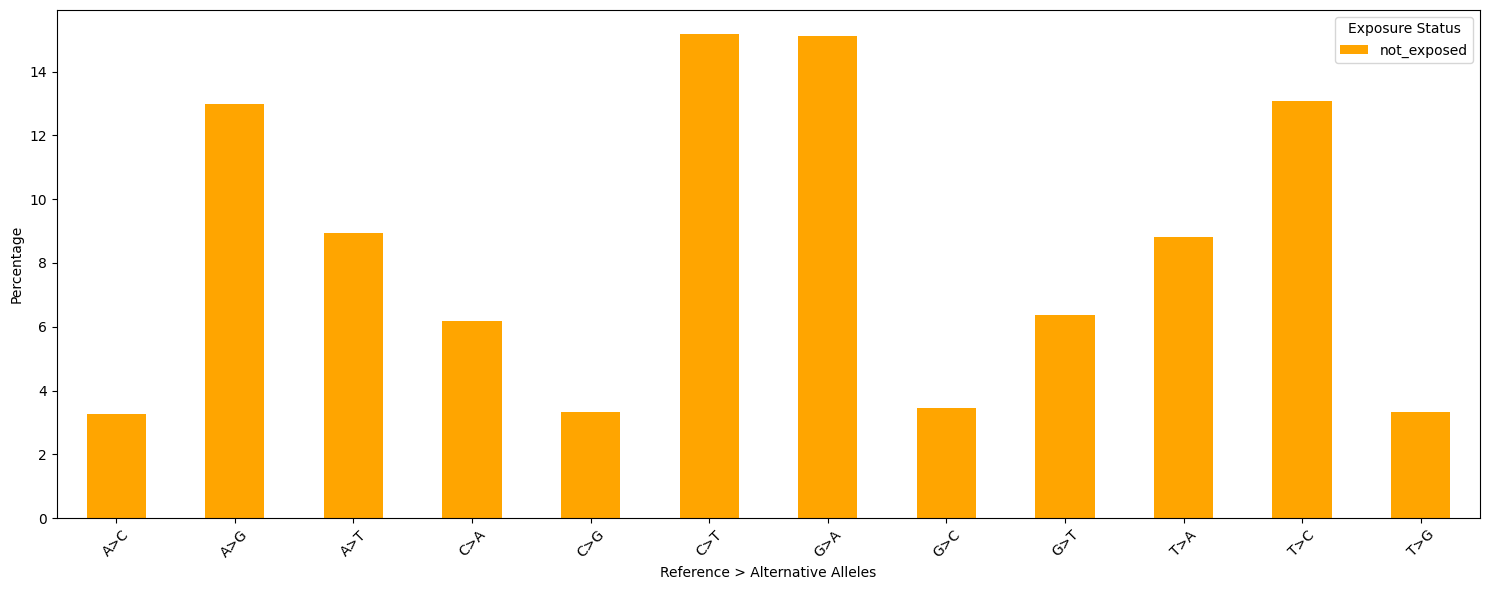

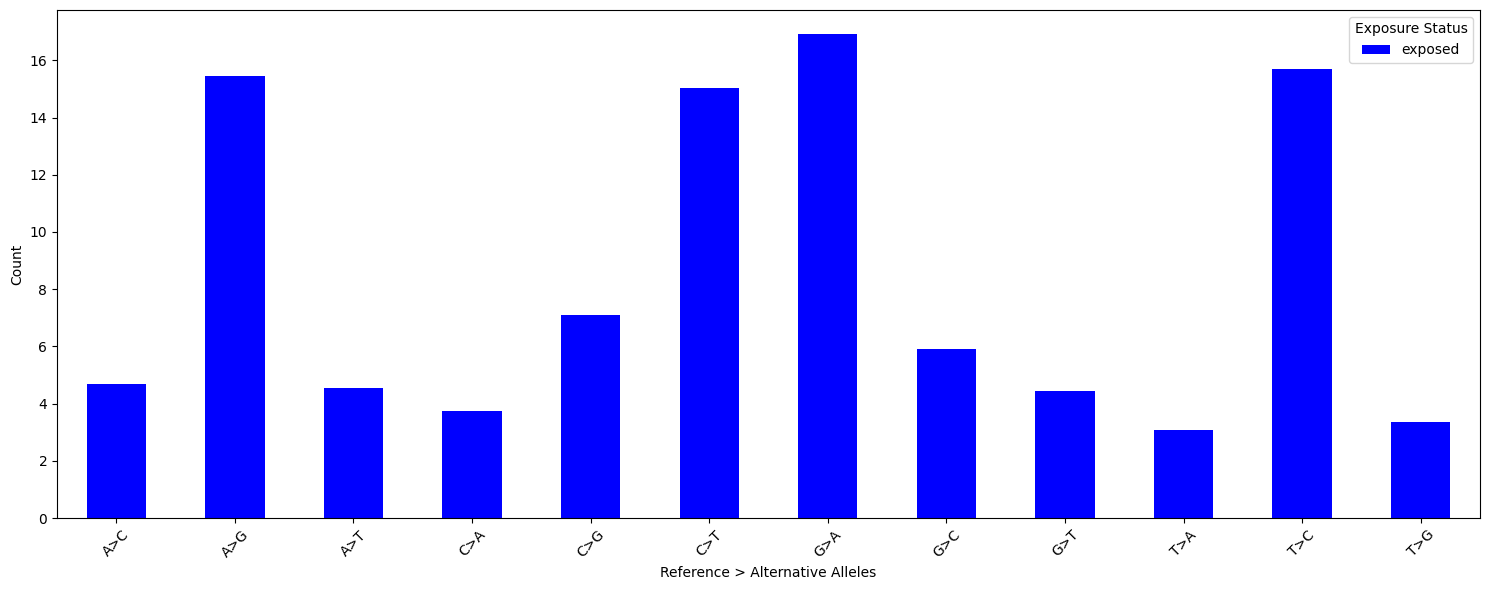

In [ ]:
import matplotlib.pyplot as plt

# Group by ref_alt and exposed to get counts
grouped = merged_df.groupby(['ref_alt', 'exposed']).size().unstack(fill_value=0)

# Separate counts for exposed and not_exposed
exposed = grouped.get('exposed', pd.Series(dtype=int))  # Use .get() to avoid KeyError
exposed_total_count = exposed.values.sum()  # Grand total of all counts
exposed_percentages = exposed / exposed_total_count * 100  # Normalize by total count and convert to percentages


not_exposed = grouped['not_exposed']
not_exposed_total_count = not_exposed.values.sum()  # Grand total of all counts
not_exposed_percentages = not_exposed / not_exposed_total_count * 100  # Normalize by total count and convert to percentages


# Create the bar plot
not_exposed_percentages.plot(kind='bar', stacked=True, figsize=(15, 6), color=['orange'])

# Group by ref_alt at the top of graph


# Add titles and labels
plt.xlabel('Reference > Alternative Alleles')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Exposure Status')
plt.tight_layout()

plt.show()




# Create the bar plot
exposed_percentages.plot(kind='bar', stacked=True, figsize=(15, 6), color=['blue'])

# Add titles and labels
plt.xlabel('Reference > Alternative Alleles')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Exposure Status')
plt.tight_layout()


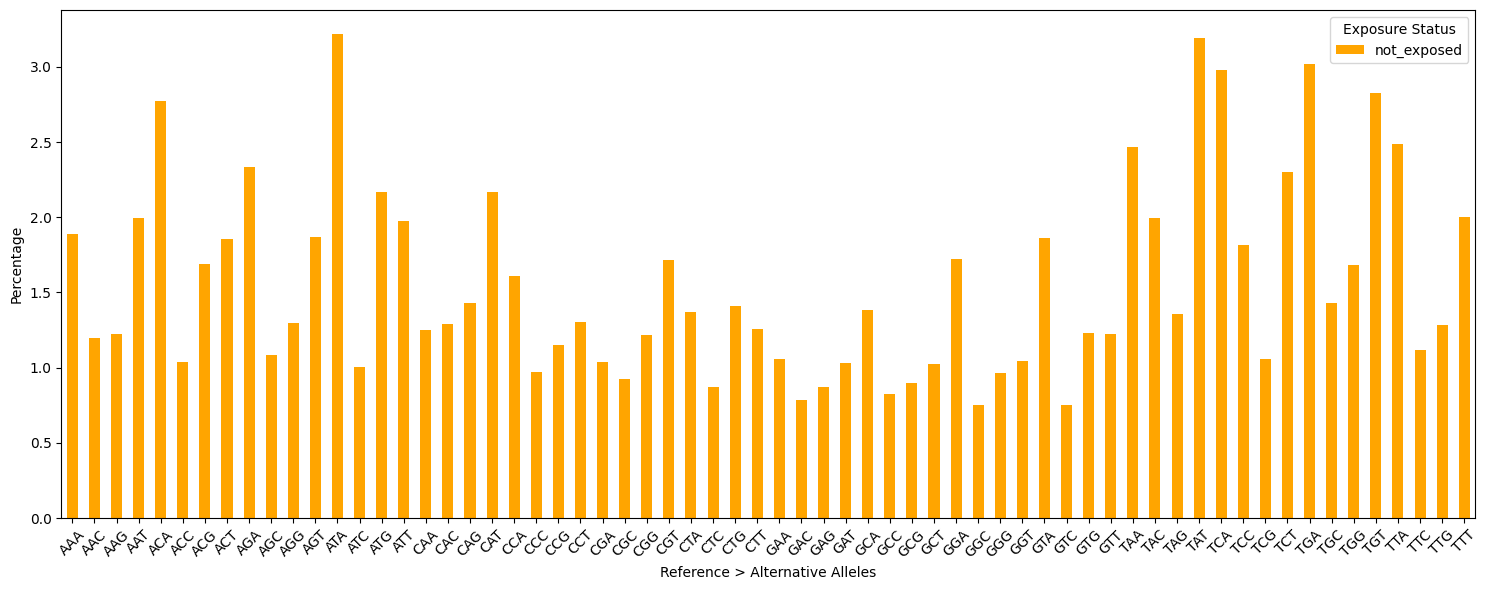

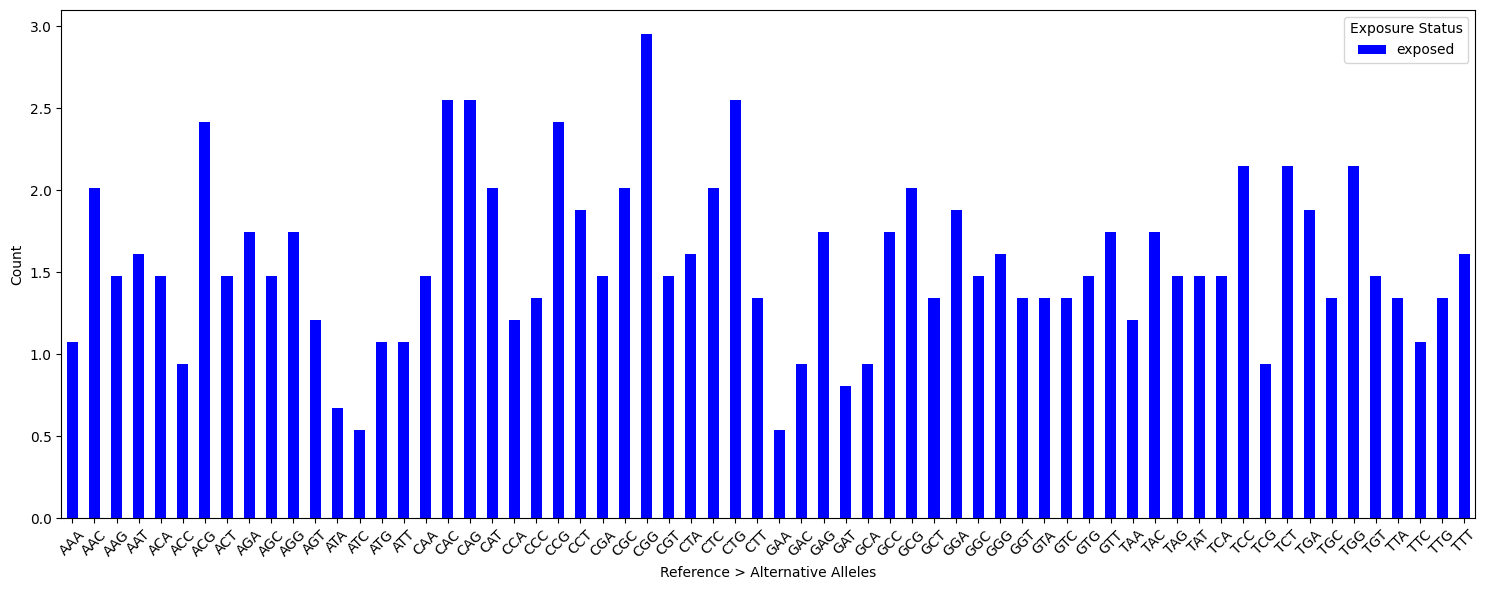

In [ ]:
# Group by ref_alt and exposed to get counts
grouped = merged_df.groupby(['context', 'exposed']).size().unstack(fill_value=0)

# Separate counts for exposed and not_exposed
exposed = grouped.get('exposed', pd.Series(dtype=int))  # Use .get() to avoid KeyError
exposed_total_count = exposed.values.sum()  # Grand total of all counts
exposed_percentages = exposed / exposed_total_count * 100  # Normalize by total count and convert to percentages


not_exposed = grouped['not_exposed']
not_exposed_total_count = not_exposed.values.sum()  # Grand total of all counts
not_exposed_percentages = not_exposed / not_exposed_total_count * 100  # Normalize by total count and convert to percentages


# Create the bar plot
not_exposed_percentages.plot(kind='bar', stacked=True, figsize=(15, 6), color=['orange'])

# Group by ref_alt at the top of graph


# Add titles and labels
plt.xlabel('Reference > Alternative Alleles')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Exposure Status')
plt.tight_layout()

plt.show()




# Create the bar plot with bars colored by ref_alt

exposed_percentages.plot(kind='bar', stacked=True, figsize=(15, 6), color=['blue'])

# Add titles and labels
plt.xlabel('Reference > Alternative Alleles')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Exposure Status')
plt.tight_layout()
